# Human Pose Estimation with 2D static input by GHUM 3D 

## What is GHUM 3D

11월 10일 간단하게 media pipe 를 이용한 pose estiamtion을 추가로 정리해 보았다. 

In [1]:
import cv2
import math
import numpy as np
import os 
image_list = os.listdir("../photo/")
import matplotlib.pyplot as plt 

이부분의 error 때문에 수동으로 리스트 만들어줌
<https://velog.io/@yjlee4093/OpenCV-cv2.imread-에러>

In [24]:
dir = [
# "/Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/photo-1519316500492-7d95d2b8c462.jpg",
# "/Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/photo-1529891858519-f18aa4f6a3b0.jpg",
# "/Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/IMG_6105.png",
"/Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/The_Skating_Minister.jpg"]

In [25]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in dir}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

/Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/The_Skating_Minister.jpg


In [26]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

In [27]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )
  
    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

Nose coordinates: (1258.3583979606628, 594.4375)
Pose landmarks of /Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/The_Skating_Minister.jpg:


Nose world landmark:
x: 0.40274935960769653
y: -0.5085957050323486
z: -0.16890938580036163
visibility: 0.9975753426551819



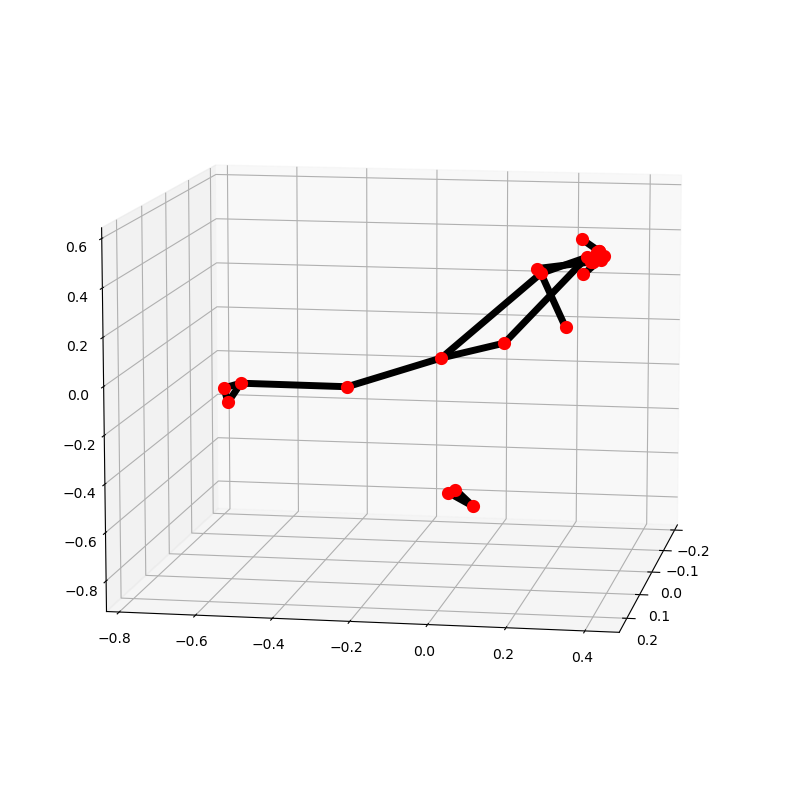

In [28]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [29]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)
    plt.figimage(annotated_image)
    plt.show()

Pose segmentation of /Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/The_Skating_Minister.jpg:


<Figure size 640x480 with 0 Axes>

In [30]:
point, line = {}, {}

with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    for name, image in images.items():
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        point[name] = results.pose_world_landmarks
        line[name] = mp_pose.POSE_CONNECTIONS

In [36]:
point

{'/Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/The_Skating_Minister.jpg': landmark {
   x: 0.40274935960769653
   y: -0.5085957050323486
   z: -0.16890938580036163
   visibility: 0.9975753426551819
 }
 landmark {
   x: 0.38913601636886597
   y: -0.5340134501457214
   z: -0.15822279453277588
   visibility: 0.9963296055793762
 }
 landmark {
   x: 0.39081692695617676
   y: -0.5337503552436829
   z: -0.14931225776672363
   visibility: 0.9961993098258972
 }
 landmark {
   x: 0.3904477655887604
   y: -0.5344939827919006
   z: -0.1527167558670044
   visibility: 0.9976420402526855
 }
 landmark {
   x: 0.3931805491447449
   y: -0.5340878963470459
   z: -0.20345211029052734
   visibility: 0.9969047904014587
 }
 landmark {
   x: 0.39378273487091064
   y: -0.530979335308075
   z: -0.21683451533317566
   visibility: 0.9972291588783264
 }
 landmark {
   x: 0.39164695143699646
   y: -0.5176483988761902
   z: -0.19641005992889404
   visibili

In [37]:
line

{'/Users/yscho/2022-2-Application-Programming-Final-Project/Reference/01_mediapose/02_mediapose-photo/photo/The_Skating_Minister.jpg': frozenset({(0,
             1),
            (0, 4),
            (1, 2),
            (2, 3),
            (3, 7),
            (4, 5),
            (5, 6),
            (6, 8),
            (9, 10),
            (11, 12),
            (11, 13),
            (11, 23),
            (12, 14),
            (12, 24),
            (13, 15),
            (14, 16),
            (15, 17),
            (15, 19),
            (15, 21),
            (16, 18),
            (16, 20),
            (16, 22),
            (17, 19),
            (18, 20),
            (23, 24),
            (23, 25),
            (24, 26),
            (25, 27),
            (26, 28),
            (27, 29),
            (27, 31),
            (28, 30),
            (28, 32),
            (29, 31),
            (30, 32)})}

In [31]:
call = list(point.keys())

In [32]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

_PRESENCE_THRESHOLD = 0.5
_VISIBILITY_THRESHOLD = 0.5


def plot_landmarks(
    landmark_list,
    connections=None,
):
    if not landmark_list:
        return
    plotted_landmarks = {}
    for idx, landmark in enumerate(landmark_list.landmark):
        if (
            landmark.HasField("visibility")
            and landmark.visibility < _VISIBILITY_THRESHOLD
        ) or (
            landmark.HasField("presence") and landmark.presence < _PRESENCE_THRESHOLD
        ):
            continue
        plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        out_cn = []
        num_landmarks = len(landmark_list.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(
                    f"Landmark index is out of range. Invalid connection "
                    f"from landmark #{start_idx} to landmark #{end_idx}."
                )
            if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
                landmark_pair = [
                    plotted_landmarks[start_idx],
                    plotted_landmarks[end_idx],
                ]
                out_cn.append(
                    dict(
                        xs=[landmark_pair[0][0], landmark_pair[1][0]],
                        ys=[landmark_pair[0][1], landmark_pair[1][1]],
                        zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    )
                )
        cn2 = {"xs": [], "ys": [], "zs": []}
        for pair in out_cn:
            for k in pair.keys():
                cn2[k].append(pair[k][0])
                cn2[k].append(pair[k][1])
                cn2[k].append(None)

    df = pd.DataFrame(plotted_landmarks).T.rename(columns={0: "z", 1: "x", 2: "y"})
    df["lm"] = df.index.map(lambda s: mp_pose.PoseLandmark(s).name).values
    fig = (
        px.scatter_3d(df, x="z", y="x", z="y", hover_name="lm")
        .update_traces(marker={"color": "red"})
        .update_layout(
            margin={"l": 0, "r": 0, "t": 0, "b": 0},
            scene={"camera": {"eye": {"x": 2.1, "y": 0, "z": 0}}},
        )
    )
    fig.add_traces(
        [
            go.Scatter3d(
                x=cn2["xs"],
                y=cn2["ys"],
                z=cn2["zs"],
                mode="lines",
                line={"color": "black", "width": 5},
                name="connections",
            )
        ]
    )

    return fig

In [33]:
fig = {}
for name in call:
    fig[name] = plot_landmarks(point[name],line[name])

In [ ]:
# for i in range(4):
#     fig[call[i]].show()

In [35]:
# colab 출력을 위한 부분
fig[call[0]]


In [ ]:
fig[call[1]]

In [ ]:
fig[call[2]]

In [ ]:
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [ ]:
username = '815choyunsin'
api_key = 'AX35ZFK83sqMoQ7QxKTZ'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
py.plot(fig[call[0]], filename = 'image 1', auto_open=True)

'https://plotly.com/~815choyunsin/1/'

In [ ]:
py.plot(fig[call[1]], filename = 'image 2', auto_open=True)

'https://plotly.com/~815choyunsin/3/'

In [ ]:
py.plot(fig[call[2]], filename = 'image 3', auto_open=True)

'https://plotly.com/~815choyunsin/5/'

In [ ]:
py.plot(fig[call[3]], filename = 'image 4', auto_open=True)

'https://plotly.com/~815choyunsin/7/'

In [ ]:
tls.get_embed('https://plotly.com/~815choyunsin/1/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~815choyunsin/1.embed" height="525" width="100%"></iframe>'